In [94]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#1 Introduction

x = sp.symbols('x') #Le symbol variable est x
f=lambda x:x #Function f(x)
sp.Lambda(x, sp.diff(f(x), x)) #Dérivée
sp.integrate(f(x), x) #Primitive
sp.integrate(f(x), (x, 2, 5)) #La valeur de l'integralle sur interval [2,5]
sp.integrate(f(x), (x, 2, 5)).evalf()

10.5000000000000

In [66]:
#Exercice de l'introduction
x = sp.symbols('x')
f=lambda x:sp.cos(2*x)*sp.exp(-x) # f(x) = cos(2x)e^(-x)
df = sp.Lambda(x, sp.diff(f(x), x)) #df dérivée de f
V1 = f(sp.pi/2) #V1 l'évaluation de f en pi/2
V2 = df(sp.pi/2) #V2 l'évaluation de df(dérivée) en pi/2
I1 = sp.integrate(f(x), x) #I1 l'integral de f
I2 = sp.integrate(f(x), (x, -1, 0)) #I2 valeur integral de f dans [-1, 0]
I = I2.evalf(); #I La valeur numérique de I2
print(df, '/', V1, '/', V2)
print('primitive = ', I1)
print('Valeur analytique = ', I2, '\nValeur numérique = ', I)

Lambda(x, -2*exp(-x)*sin(2*x) - exp(-x)*cos(2*x)) / -exp(-pi/2) / exp(-pi/2)
primitive =  2*exp(-x)*sin(2*x)/5 - exp(-x)*cos(2*x)/5
Valeur analytique =  E*cos(2)/5 - 1/5 + 2*E*sin(2)/5 
Valeur numérique =  0.562449792050565


In [74]:
x = sp.symbols('x')
g=lambda x:sp.log(x)/(1+x**2)
I = sp.integrate(g(x), (x,1/sp.E,sp.E))
I #It couldn't calculate the integral of that function, sometimes when the
#function is too complicated. It can not do it!

In [89]:
#2 Application

#Question 1
def formulecomposite(f, df, a, b, n):
    h = (b - a)/n
    s1 = 0
    s2 = 0
    for i in range(1, n):
        s1 += f(a + h*i)
    for i in range(n):
        s2 += f(a + (i + 1/2)*h)
    return (h/60)*(14*(f(a)+f(b)) + h*(df(a)-df(b)) + 28*s1 + 32*s2)

Text(0.5, 1.0, 'La courbe de f')

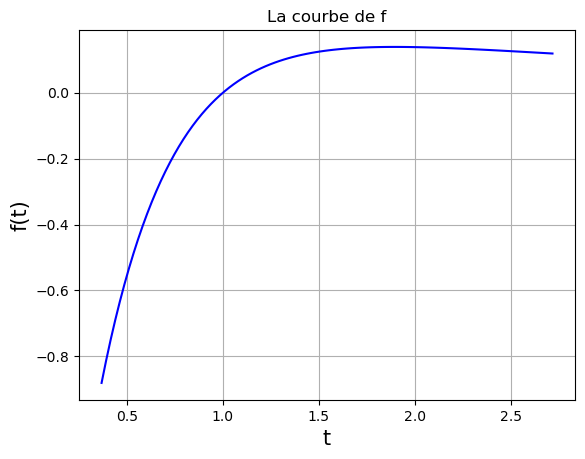

In [163]:
#Question 2
f=lambda t:np.log(t)/(1+t**2)

#Question 2, a)
t = np.linspace(1/np.e, np.e, 100);
plt.plot(t, f(t), 'b')
plt.xlabel('t', fontsize=15)
plt.ylabel('f(t)', fontsize=15)
plt.grid(True)
plt.title('La courbe de f')

In [154]:
#Question 2, b)
x = sp.symbols('x')
f=lambda x:sp.log(x)/(1+x**2)
df = sp.Lambda(x, sp.diff(f(x), x))
formulecomposite(f, df, 1/sp.E, sp.E, 30).evalf()

1.25785268765959e-9

In [172]:
#Question 2, c)
def nombreintervalles(f, df, a, b, epsilon):
    n=1
    E=np.abs(formulecomposite(f, df, a, b, n))
    while E > epsilon:
        n+=1
        E=abs(formulecomposite(f, df, a, b, n))
    return n

In [178]:
nombreintervalles(f, df, 1/np.e, np.e, 10**-7)

15

Text(0, 0.5, 'y')

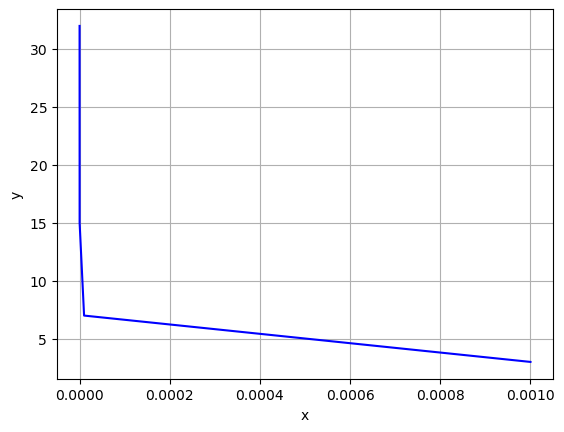

In [196]:
#Question 2, d)
x = (1/10)**np.arange(3, 10, 2)
N_iter = []
for Ix in x:
    N_iter.append(nombreintervalles(f, df, 1/np.e, np.e, Ix))
plt.plot(x, N_iter, 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [201]:
#Question 2, e)
nombreintervalles(f, df, 1/np.e, np.e, 10**-7) #n = 15
h = (np.e - 1/np.e)/15 #Alors h maximal ... est: h = 0.156693492485402

In [204]:
#Question 3

#Question 3, a)
def erreurquadrature(a, b, n, k):
    x = sp.symbols('x')
    P=lambda x:x**k
    dP = sp.Lambda(x, sp.diff(P(x), x)) #Dérivée juste pour utiliser la fonction formulecomposite()
    IR = sp.integrate(P(x), (x, a, b)).evalf() #Integral real value
    IQ = formulecomposite(P, dP, a, b, n).evalf() #Integral approached value
    return abs(IR - IQ) #La valeur de l'erreur of the approached value

In [216]:
#Question 3, b)
def degreprecision(a, b, n):
    d = 0
    while(erreurquadrature(a, b, n, d) == 0):
        d+=1
    return d-1

In [217]:
#Question 3, c)
degreprecision(-1, 0, 1)

5